In [10]:
import cv2

from photutils import Background2D, SigmaClip, MedianBackground

from skimage import color
from skimage import exposure

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def background_removal(source):
    """
    A function to remove gradients in the background of AFM micrographs. Takes in a .txt source file and returns the
    image as a numpy array with the background gradient removed.
    """
    #Generate a numpy array from the .txt file and convert values from m to nm
    afmdata = np.genfromtxt(source)
    afmdata= afmdata*(10**9)
    height, width = afmdata.shape

    #Remove any background that is greater than 3 stddevs from the mean. Removes gradients in the image.
    sigma_clip = SigmaClip(sigma=3., iters=10)
    bkg_estimator = MedianBackground()
    bkg = Background2D(afmdata, (50, 50), filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
    backgrounded = afmdata - bkg.background

    return backgrounded

In [3]:
image = background_removal('../Data/UnbackgroundedTXT/500nmGood-0')

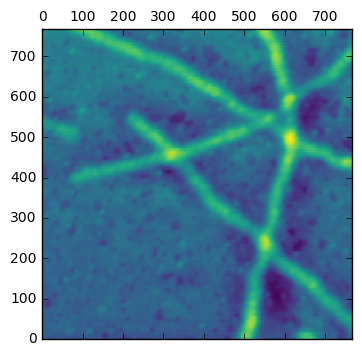

In [4]:
plt.matshow(image, origin = 'lower', cmap = 'viridis')

In [11]:
def convert_dtype(image):
    """
    A function to convert data to a uint8 data type. Takes in an image or numpy array and returns the file with pixel
    values converted to uint8 datatype.
    """
    #Get dimensions of the array
    data = image
    data = data*(10**9)
    height, width = data.shape
    
    #Rescale data to uint8 values
    converted = np.zeros((height, width, 3))

    factor = (255)/(data.max()-data.min())

    for i in range(height):
        for j in range(width):
            intensity = np.int((data[i][j]-data.min())*factor)
            converted[i][j] = np.array([intensity, intensity, intensity])
    #Complete the conversion
    converted = np.uint8(converted)
    
    return converted

In [6]:
print (image)

[[-1.4935     -1.42446564 -1.42436521 ..., -0.15407355 -0.54101243
  -0.85737054]
 [-1.63251976 -1.56348551 -1.49338538 ..., -0.3633778  -0.74929466
  -1.0656304 ]
 [-1.49359159 -1.42455764 -1.42445842 ..., -0.22528584 -0.61113738
  -0.99740681]
 ..., 
 [ 2.25139281  2.39045327  2.52952251 ...,  0.93218056  0.79341211
   0.65486456]
 [ 2.35980983  2.49877518  2.56845848 ...,  0.99507417  0.85635832
   0.57886117]
 [ 2.33002816  2.46899842  2.46919587 ..., -2.2075154  -2.20728243
  -2.20673293]]


In [7]:
test = convert_dtype(image)

In [8]:
print (test.shape)

(768, 768, 3)


In [ ]:
plt.matshow(test, cmap = 'viridis')